<h2 align='center'> Application Of Descriptive Analytics in Banking - A Credit Card Use Case </h2>

### Problem Statement

The portfolio manager of a leading consumer credit card feels his current spend acceleration strategy is not aligned with the need of his customers which is a major cause of lower spends on the credit card.

As a first step he would like to deep dive and understanding <b> what is the typical spend pattern of the customers</b> in his portfolio. This will help him gain some initial pointer to pivot his current strategy accordingly. 

The current portfolio is divided in different segments based on characteristics like Product , Payments Patterns and Customer Value and Potential. 

The manager is also keen to understand in detail if the <b>spend behavior varies across these customer segments</b> which will give him some idea to the level of granularity he needs to think to come up with his revamped spend growth strategy.  

### About the Dataset:

Data available for the challenge has credit card spend information for the period Jan2013 - Jun2013. It also has information on type of customer and type of card. Detailed description for each variable is provided in the data dictionary given below. The data available to us is a preloaded dataset.

#### Data description :

- Month : Calendar Month (Data has spend information for period Jan2013 -Jun-2013)
- CLIENTNUM : Client Number(Primary Key)
- Wealth_tag : Internal classification variable, used to classify customers based on their wealth (High Net Worth, Affluent, Emerging Affluent, Mass-Market)
- Card_type : Internal product fact variable - Card type depicting the variants of the cards by value proposition(Blue, Gold & Platinum)
- Revlv_ind : Internal fact variable- Revolving Indicator depicts different customer segments based on their payment behavior
- spend_category : Type of Spend (Airlines, Auto, Business, Entertainment, Grocery, Personal)
- trans_amt : Average Amount Spent per Transaction 
- trans_cnt: Count of Transactions/Transaction Frequency

<hr>

#### Import essential packages 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

from warnings import filterwarnings
filterwarnings('ignore')

#### Loading Dataset 

In [2]:
df = pd.read_csv('Dataset/Descriptive_Analytics_Banking_Data18MAY.csv', delimiter=';')
df.head()

,Month,CLIENTNUM,wealth_tag,card_type,Revlv_ind,spend_category,Trans_amt,trans_cnt
0,1301,9124400,High Net Worth,Blue,Transactor,Grocery,76.40,9
1,1301,9124400,High Net Worth,Blue,Transactor,Auto,55.48,6
2,1301,5782042,High Net Worth,Blue,Transactor,Airlines,79.16,8
3,1301,5782042,High Net Worth,Blue,Transactor,Grocery,78.87,8
4,1301,5782042,High Net Worth,Blue,Transactor,Auto,58.00,6


In [3]:
df.tail()

,Month,CLIENTNUM,wealth_tag,card_type,Revlv_ind,spend_category,Trans_amt,trans_cnt
8047,1306,2927163,MM,Platinum,Delinquent,Business,26.34,2
8048,1306,2927163,MM,Platinum,Delinquent,Entertainment,10.04,2
8049,1306,8958901,MM,Platinum,Delinquent,Grocery,25.59,2
8050,1306,8958901,MM,Platinum,Delinquent,Entertainment,12.64,2
8051,1306,8958901,MM,Platinum,Delinquent,Airlines,12.88,2


### Inspecting Data

In [4]:
df.shape

(8052, 8)

- Dataset comprises 8,052 observations(rows) and 8 features(columns)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8052 entries, 0 to 8051
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Month           8052 non-null   int64  
 1   CLIENTNUM       8052 non-null   int64  
 2   wealth_tag      8052 non-null   object 
 3   card_type       8052 non-null   object 
 4   Revlv_ind       8052 non-null   object 
 5   spend_category  8052 non-null   object 
 6   Trans_amt       8048 non-null   float64
 7   trans_cnt       8052 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 503.4+ KB


- It has 3 integer column, 1 float column and 4 object column 
- It  seems to have some null values in transaction amount attribute


In [6]:
df.isnull().sum()

Month             0
CLIENTNUM         0
wealth_tag        0
card_type         0
Revlv_ind         0
spend_category    0
Trans_amt         4
trans_cnt         0
dtype: int64

- There are 4 null values in trans_amt 

### Statistical Summary
- Get some insight of data using describe() function

In [7]:
df.describe()

,Month,CLIENTNUM,Trans_amt,trans_cnt
count,8052.000000,8.052000e+03,8048.000000,8052.000000
mean,1303.512916,5.048122e+06,45.405857,5.045455
std,1.713183,2.792297e+06,38.027026,3.810395
min,1301.000000,1.119200e+04,1.010000,1.000000
25%,1302.000000,2.707262e+06,19.420000,2.000000
50%,1304.000000,5.138360e+06,33.705000,4.000000
75%,1305.000000,7.239774e+06,57.927500,6.000000
max,1306.000000,1.000728e+07,266.720000,26.000000


- Trans_amt and trans_cnt have large difference in their 75% and maximum value ie, it confirms the presence of outliers
- Mean of trans_amt is shifted due to presence of outlier in data

#### Checking Skewness 

In [8]:
df[['Month','CLIENTNUM','Trans_amt','trans_cnt']].skew()

Month       -0.005451
CLIENTNUM   -0.015012
Trans_amt    1.916528
trans_cnt    1.874800
dtype: float64

**The skewness checks the  Symmetry of curve :** 

* Month, CLIENTNUM  are negatively skewed ie. Mean < Median
* Trans_amt, trans_cnt  are positively Skewed (Mean > Median)

#### Checking kurtosis 

In [9]:
df[['Month','CLIENTNUM','Trans_amt','trans_cnt']].kurt()

Month       -1.275321
CLIENTNUM   -1.086919
Trans_amt    4.502248
trans_cnt    4.264457
dtype: float64

**The kurtosis checks the peakness of curve :**
* Month, CLIENTNUM are **Platykurtic** in nature ie. Flat and spread out
* Trans_amt, trans_cnt are **Leptokurtic** in nature

#### Checking Range 

In [10]:
col = ['Month','CLIENTNUM','Trans_amt','trans_cnt']
for i in col:
    range_ = max(df[i]) - min(df[i])
    print(f"Range of {i} is {range_}")

Range of Month is 5
Range of CLIENTNUM is 9996085
Range of Trans_amt is 265.71000000000004
Range of trans_cnt is 25


### Correlation Matrix

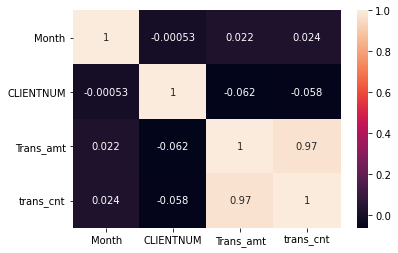

In [11]:
sns.heatmap(df.corr(), annot = True)

- Attribute Trans_amt has high positive correlation with trans_cnt
- CLIENTNUM seems to have very low correlation or no corrlation with any variable, seems to be irrelevent column

### Exploratory Data Analysis

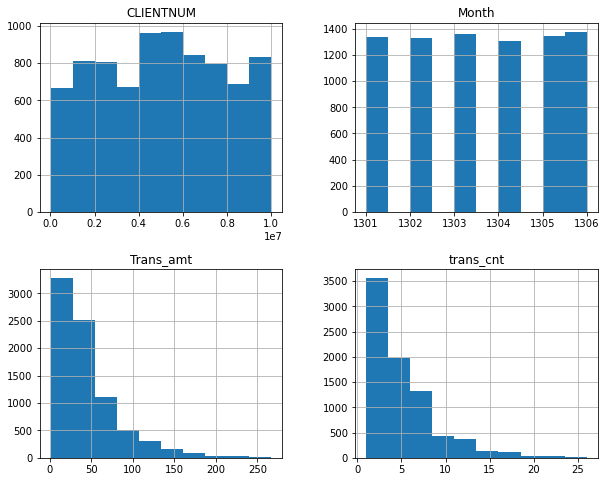

In [12]:
df.hist(figsize=(10,8));

- Data of trans_amt, and trans_cnt is postively skewed ie shifted towards left

In [13]:
# creating copy of dataset
data = df.copy()

# converting data to normal distribution
data['Trans_amt'] = np.log(df['Trans_amt'])
data['trans_cnt'] = np.log(df['trans_cnt'])

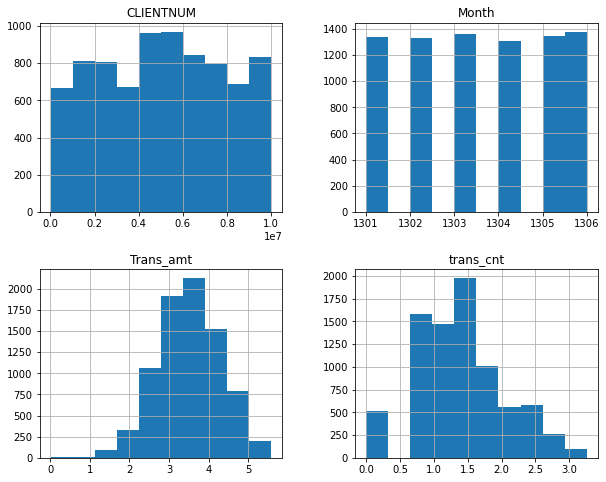

In [14]:
data.hist(figsize=(10,8));

- Now the data is normally distributed
- Clientnum is not relevent attribute for prediction

### Analysing Data with respect to Months

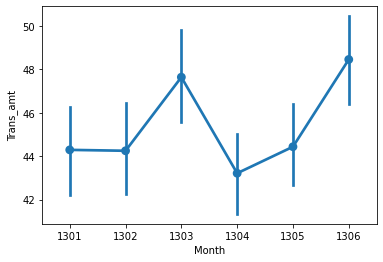

In [15]:
sns.pointplot(df.Month, df.Trans_amt)

1301 indicates january 2013 , and so on... 

- Month of june and march seems to be top 2 months where transaction amount is high

In [16]:
df['Month'].value_counts()

1306    1376
1303    1358
1305    1347
1301    1335
1302    1329
1304    1307
Name: Month, dtype: int64

In [17]:
df1 = df.groupby(['Month']).sum()
df1['months'] = df1.index
df1.head()

,CLIENTNUM,Trans_amt,trans_cnt,months
Month,,,,
1301,6723838918,59080.66,6543,1301
1302,6763189069,58804.10,6549,1302
1303,6854232193,64639.95,7166,1303
1304,6537048178,56478.36,6331,1304
1305,6805461491,59806.70,6701,1305


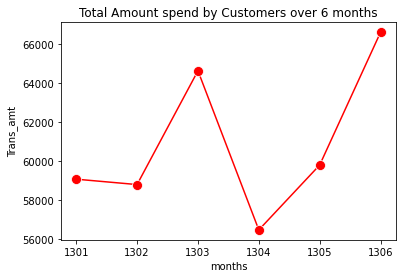

In [18]:
sns.lineplot(df1['months'], df1['Trans_amt'], color = 'r', marker='o', markersize = 10)
plt.title('Total Amount spend by Customers over 6 months')
plt.show()

- Total Amount is Maximum spend in month June & Minimum in April

### Analysing Data with respect to Card type :

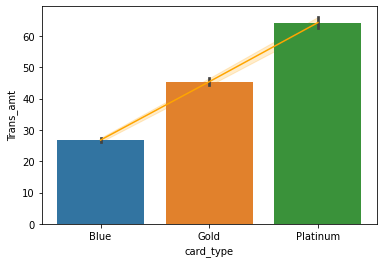

In [19]:
sns.barplot(df['card_type'], df['Trans_amt'])
sns.lineplot(df['card_type'], df['Trans_amt'], color='orange');

- Platinum card customers have high transaction amount
- Blue card customers seems to have lowest transaction amount

In [20]:
df['card_type'].value_counts()

Gold        2707
Blue        2696
Platinum    2649
Name: card_type, dtype: int64

- Gold card have maximum number of observations
- Platinumm have least number of observation

In [21]:
pd.crosstab(df.Month, df.card_type)

card_type,Blue,Gold,Platinum
Month,,,
1301,451,439,445
1302,441,450,438
1303,450,457,451
1304,444,432,431
1305,456,462,429
1306,454,467,455


### Platinum Card Customer Analysis

In [22]:
platinum = df[df['card_type']=='Platinum']
platinum.head()

,Month,CLIENTNUM,wealth_tag,card_type,Revlv_ind,spend_category,Trans_amt,trans_cnt
228,1301,5233857,High Net Worth,Platinum,Transactor,Entertainment,74.66,8
229,1301,5233857,High Net Worth,Platinum,Transactor,Personal,74.00,8
230,1301,4253063,High Net Worth,Platinum,Transactor,Grocery,221.97,23
231,1301,4253063,High Net Worth,Platinum,Transactor,Auto,151.94,16
232,1301,4253063,High Net Worth,Platinum,Transactor,Airlines,232.78,22


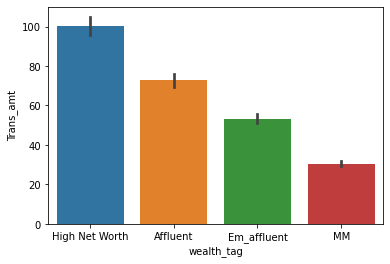

In [23]:
sns.barplot(platinum['wealth_tag'], platinum['Trans_amt'])

- Customer with Platinum Card and having wealth tag "High net Worth" had done Maximum Transactions
- Customer with Platinum Card and having wealth tag "MM" had done Maximum Transactions

In [24]:
platinum['Average_Spend'] = platinum['Trans_amt']/platinum['trans_cnt']
platinum['Average_Spend'].head()

228     9.332500
229     9.250000
230     9.650870
231     9.496250
232    10.580909
Name: Average_Spend, dtype: float64

In [25]:
df_p = platinum.groupby(['Month']).sum()
df_p['months'] = df_p.index
df_p.head()

,CLIENTNUM,Trans_amt,trans_cnt,Average_Spend,months
Month,,,,,
1301,2202660730,27766.10,3014,3965.990216,1301
1302,2175427419,27174.21,2929,4005.730162,1302
1303,2248740679,30964.30,3332,4134.567352,1303
1304,2145203658,26331.11,2852,3944.735850,1304
1305,2145022749,27533.54,2959,3959.111942,1305


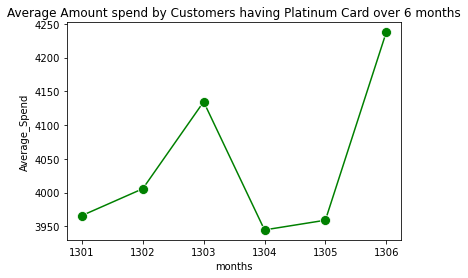

In [26]:
sns.lineplot(df_p['months'], df_p['Average_Spend'], color = 'g', marker='o', markersize = 10)
plt.title('Average Amount spend by Customers having Platinum Card over 6 months')
plt.show()

- For only platinum card customers, Average transactions droped for month january, feb, and may
- For month of june, they spend the most

### Blue Card customer Analysis 

In [27]:
blue = df[df['card_type']=='Blue']
blue.head()

,Month,CLIENTNUM,wealth_tag,card_type,Revlv_ind,spend_category,Trans_amt,trans_cnt
0,1301,9124400,High Net Worth,Blue,Transactor,Grocery,76.40,9
1,1301,9124400,High Net Worth,Blue,Transactor,Auto,55.48,6
2,1301,5782042,High Net Worth,Blue,Transactor,Airlines,79.16,8
3,1301,5782042,High Net Worth,Blue,Transactor,Grocery,78.87,8
4,1301,5782042,High Net Worth,Blue,Transactor,Auto,58.00,6


- Customer with Blue Card and having wealth tag "High net Worth" had done Maximum Transactions
- Customer with Blue Card and having wealth tag "MM" had done Minimum Transactions

In [28]:
blue['Average_Spend'] = blue['Trans_amt']/blue['trans_cnt']
blue['Average_Spend'].head()

0    8.488889
1    9.246667
2    9.895000
3    9.858750
4    9.666667
Name: Average_Spend, dtype: float64

In [29]:
df_b = blue.groupby(['Month']).sum()
df_b['months'] = df_b.index
df_b.head()

,CLIENTNUM,Trans_amt,trans_cnt,Average_Spend,months
Month,,,,,
1301,2163186239,11580.50,1365,3953.956214,1301
1302,2186987966,11753.26,1382,3808.754667,1302
1303,2182430398,12476.70,1489,3888.347821,1303
1304,2155949459,11569.83,1400,3719.630147,1304
1305,2277193971,11989.93,1454,3904.448984,1305


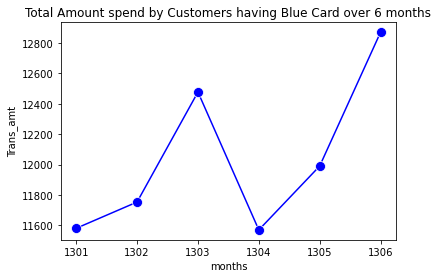

In [30]:
sns.lineplot(df_b['months'], df_b['Trans_amt'], color = 'b', marker='o', markersize = 10)
plt.title('Total Amount spend by Customers having Blue Card over 6 months')
plt.show()

- Blue card users also spend most in month march and june

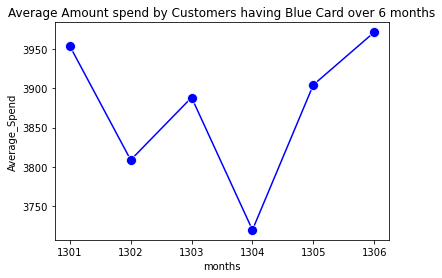

In [31]:
sns.lineplot(df_b['months'], df_b['Average_Spend'], color = 'b', marker='o', markersize = 10)
plt.title('Average Amount spend by Customers having Blue Card over 6 months')
plt.show()

There is Drastic change in Analaysis of Blue card customers:
- For month of january and june they have high average transaction amount value
- In month of April, they spend the least

### Analysing Data with respect to Spend Category

In [32]:
pd.crosstab(df.Month, df.spend_category)

spend_category,Airlines,Auto,Business,Entertainment,Grocery,Personal
Month,,,,,,
1301,232,231,225,212,225,210
1302,219,202,212,232,221,243
1303,227,230,230,235,220,216
1304,200,235,227,211,214,220
1305,236,224,209,223,236,219
1306,223,217,236,245,224,231


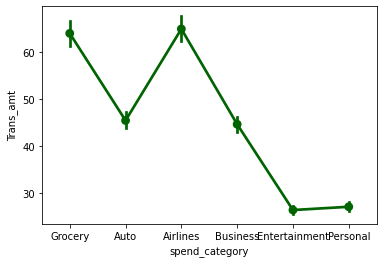

In [33]:
sns.pointplot(df.spend_category, df.Trans_amt, color='darkgreen')

- Most of the customers do their transaction for Grocery and Airlines
- Customers usually don't spend much on Personal things and Entertainment 

### Grocery Analysis

In [34]:
grocey = df[df['spend_category']=='Grocery']
grocey.head()

,Month,CLIENTNUM,wealth_tag,card_type,Revlv_ind,spend_category,Trans_amt,trans_cnt
0,1301,9124400,High Net Worth,Blue,Transactor,Grocery,76.40,9
3,1301,5782042,High Net Worth,Blue,Transactor,Grocery,78.87,8
8,1301,4653449,High Net Worth,Blue,Transactor,Grocery,80.43,9
10,1301,1929367,High Net Worth,Blue,Transactor,Grocery,68.02,7
12,1301,5225795,High Net Worth,Blue,Transactor,Grocery,58.84,7


In [35]:
grocey['Average_Spend'] = grocey['Trans_amt']/grocey['trans_cnt']
grocey['Average_Spend'].head()

0     8.488889
3     9.858750
8     8.936667
10    9.717143
12    8.405714
Name: Average_Spend, dtype: float64

In [36]:
df_g = grocey.groupby(['Month']).sum()
df_g['months'] = df_g.index
df_g.head()

,CLIENTNUM,Trans_amt,trans_cnt,Average_Spend,months
Month,,,,,
1301,1158031159,14729.00,1565,2117.810413,1301
1302,1110645292,12894.08,1417,1965.327450,1302
1303,1066818726,15233.61,1650,1986.058136,1303
1304,1020334901,12906.06,1406,1907.423350,1304
1305,1186658752,15045.01,1624,2170.086734,1305


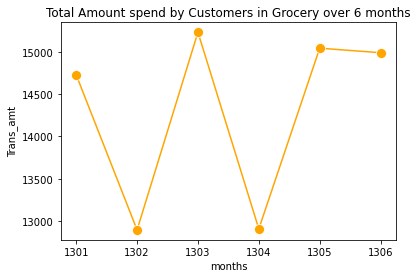

In [37]:
sns.lineplot(df_g['months'], df_g['Trans_amt'], color = 'orange', marker='o', markersize = 10)
plt.title('Total Amount spend by Customers in Grocery over 6 months')
plt.show()

- In the month of feb, and april customers spend least on grocery

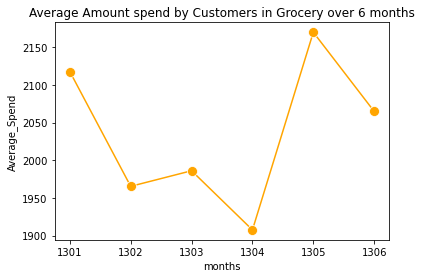

In [38]:
sns.lineplot(df_g['months'], df_g['Average_Spend'], color = 'orange', marker='o', markersize = 10)
plt.title('Average Amount spend by Customers in Grocery over 6 months')
plt.show()

Average transaction analaysis over 6 months
- In month of may, customers have maximum average transaction on grocery

### Airlines Analysis

In [39]:
airlines = df[df['spend_category']=='Airlines']
airlines.head()

,Month,CLIENTNUM,wealth_tag,card_type,Revlv_ind,spend_category,Trans_amt,trans_cnt
2,1301,5782042,High Net Worth,Blue,Transactor,Airlines,79.16,8
6,1301,3427120,High Net Worth,Blue,Transactor,Airlines,72.82,9
14,1301,5225795,High Net Worth,Blue,Transactor,Airlines,76.69,8
18,1301,8929607,High Net Worth,Blue,Transactor,Airlines,61.80,6
20,1301,9603312,High Net Worth,Blue,Transactor,Airlines,63.92,7


In [40]:
df_a = airlines.groupby(['Month']).sum()
df_a['months'] = df_a.index
df_a.head()

,CLIENTNUM,Trans_amt,trans_cnt,months
Month,,,,
1301,1191877380,14327.19,1524,1301
1302,1115598619,14947.89,1597,1302
1303,1113853865,14785.93,1602,1303
1304,1004098348,12523.26,1365,1304
1305,1234689480,14866.17,1609,1305


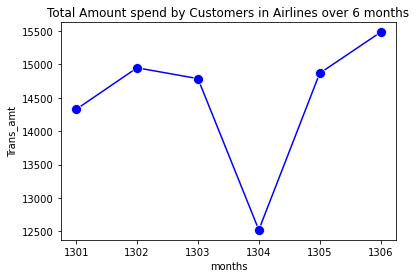

In [41]:
sns.lineplot(df_a['months'], df_a['Trans_amt'], color = 'blue', marker='o', markersize = 10)
plt.title('Total Amount spend by Customers in Airlines over 6 months')
plt.show()

- Customers usually don't book airlines in month of april

### Analysis with respect to Revlv_ind

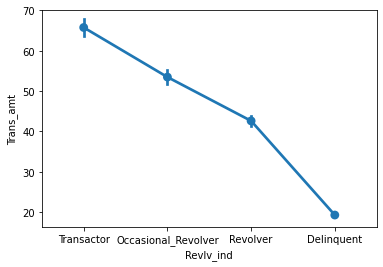

In [42]:
sns.pointplot(df.Revlv_ind, df.Trans_amt)

- Customers from Trasactor contributes the most in transaction amount
- Customer from Delinquent had done Minimum Transactions

### Analysis with respect to Wealth tag

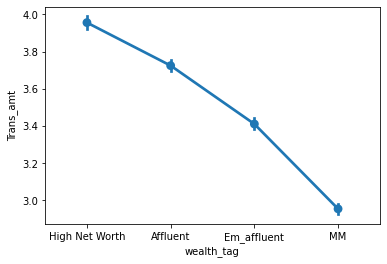

In [43]:
sns.pointplot(data['wealth_tag'], data['Trans_amt'])

- Customer with  wealth tag "High net Worth" had done Maximum Transactions 
- Customer with  wealth tag "MM" had done Minimum Transactions 


<h2 align='center'> Conclusion </h2>

<hr>

**Customer who spend the Most**

- Customers with wealth tag " High Net Worth "
- Customers with card_type " Platinum"
- Customers from  Occasional_Revolver 
- Customers spend most at Airlines and Grocery

**Customer who spend the Least**

- Customers with wealth tag " MM "
- Customers with card_type " Blue "
- Customers from Delinquent
- Customers spend Least at Entertainment and Personal

<h3 align='center'> Analysing seperately </h3>

### Taking all the Categories who spend the Least

In [44]:
df.head()

,Month,CLIENTNUM,wealth_tag,card_type,Revlv_ind,spend_category,Trans_amt,trans_cnt
0,1301,9124400,High Net Worth,Blue,Transactor,Grocery,76.40,9
1,1301,9124400,High Net Worth,Blue,Transactor,Auto,55.48,6
2,1301,5782042,High Net Worth,Blue,Transactor,Airlines,79.16,8
3,1301,5782042,High Net Worth,Blue,Transactor,Grocery,78.87,8
4,1301,5782042,High Net Worth,Blue,Transactor,Auto,58.00,6


In [45]:
df_least = df[(df['wealth_tag']=='MM') & (df['card_type']=='Blue') & (df['Revlv_ind']=='Delinquent') &
    ((df['spend_category']=='Entertainment') | (df['spend_category']=='Personal')) ]
df_least.head()

,Month,CLIENTNUM,wealth_tag,card_type,Revlv_ind,spend_category,Trans_amt,trans_cnt
1089,1301,385784,MM,Blue,Delinquent,Entertainment,9.19,2
1092,1301,2706844,MM,Blue,Delinquent,Personal,3.48,2
1096,1301,2706844,MM,Blue,Delinquent,Entertainment,18.92,1
1097,1301,3395502,MM,Blue,Delinquent,Personal,3.75,1
1102,1301,729724,MM,Blue,Delinquent,Personal,11.41,1


In [46]:
df_least = df_least.groupby(['Month']).sum()
df_least['months'] = df_least.index
df_least.head()

,CLIENTNUM,Trans_amt,trans_cnt,months
Month,,,,
1301,45119849,107.40,18,1301
1302,46925245,39.56,12,1302
1303,37092572,92.67,14,1303
1304,31828540,98.91,11,1304
1305,37458277,56.14,13,1305


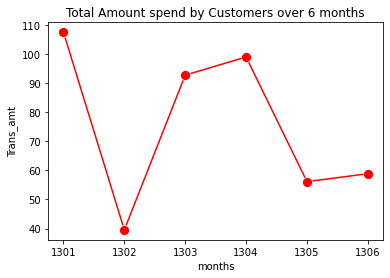

In [47]:
sns.lineplot(df_least['months'], df_least['Trans_amt'], color = 'red', marker='o', markersize = 10)
plt.title('Total Amount spend by Customers over 6 months')
plt.show()

Those customers who spent least transactions in overall data had been analysed seperately, 
- They spend most in January and least in February

### Taking all the Categories who spend the Most 

In [48]:
df_imp = df[(df['wealth_tag']=='High Net Worth') & (df['card_type']=='Platinum') & (df['Revlv_ind']=='Occasional_Revolver') &
    ((df['spend_category']=='Grocery') | (df['spend_category']== 'Airlines')) ]
df_imp.head()

,Month,CLIENTNUM,wealth_tag,card_type,Revlv_ind,spend_category,Trans_amt,trans_cnt
261,1301,2805062,High Net Worth,Platinum,Occasional_Revolver,Grocery,195.50,18
263,1301,7137565,High Net Worth,Platinum,Occasional_Revolver,Grocery,177.84,18
266,1301,6272869,High Net Worth,Platinum,Occasional_Revolver,Grocery,183.84,19
267,1301,1502831,High Net Worth,Platinum,Occasional_Revolver,Airlines,177.82,19
269,1301,9987877,High Net Worth,Platinum,Occasional_Revolver,Airlines,181.27,18


In [49]:
df_imp = df_imp.groupby(['Month']).sum()
df_imp['months'] = df_imp.index
df_imp.head()

,CLIENTNUM,Trans_amt,trans_cnt,months
Month,,,,
1301,66618421,1788.56,185,1301
1302,70450540,1703.78,175,1302
1303,67460727,1837.21,186,1303
1304,51577383,1312.95,138,1304
1305,40987348,1386.94,147,1305


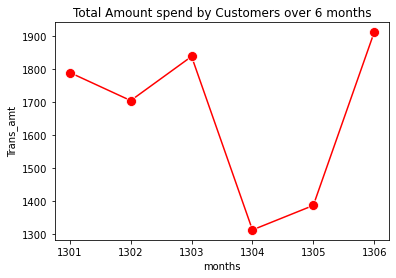

In [50]:
sns.lineplot(df_imp['months'], df_imp['Trans_amt'], color = 'red', marker='o', markersize = 10)
plt.title('Total Amount spend by Customers over 6 months')
plt.show()

Those customers who spent most of transactions in overall data had been analysed seperately,
- They spend most in month of june and spend least in month of april